In [1]:
import pandas as pd
import numpy as np

# 데이터 로드
df = pd.read_csv("https://raw.githubusercontent.com/hongsukyi/Lectures/main/data/vds16.csv")
df["Date"] = pd.to_datetime(df["Date"])

# 하루 구간 추출 (288~576 → 288개)
df_day = df.iloc[288*2:288*3].copy()
df_day = df_day.set_index("Date")

# 10분 단위 변환 (144개)
df_10min = df_day.resample("10min").mean()

df_10min["Label"] = pd.qcut(
    df_10min["Speed"],
    q=3,
    labels=[0, 1, 2]
).astype(int)

print(df_10min["Label"].value_counts().sort_index())
import numpy as np

# ── Date → Sin, Cos 변환 (하루 주기: 144) ──
time_index = np.arange(len(df_10min))
period = 144

df_10min["Sin"] = np.sin(2 * np.pi * time_index / period)
df_10min["Cos"] = np.cos(2 * np.pi * time_index / period)

# 필요한 컬럼만 구성
df2 = df_10min[["Sin", "Cos", "ToVol", "OccRate", "Label"]].copy()
df2 = df2.rename(columns={"OccRate": "Occ"})
df2 = df2.rename(columns={"ToVol": "Vol"})
# 최종 데이터프레임 교체
df = df2.reset_index(drop=True)

# CSV 파일로 저장
df.to_csv("vds.csv", index=False, encoding="utf-8-sig")

df.head()

Label
0    48
1    48
2    48
Name: count, dtype: int64


,Sin,Cos,Vol,Occ,Label
0,0.000000,1.000000,40.0,1.590,2
1,0.043619,0.999048,37.5,1.470,2
2,0.087156,0.996195,33.0,1.370,2
3,0.130526,0.991445,23.0,0.950,2
4,0.173648,0.984808,32.5,1.365,2


<Axes: xlabel='None', ylabel='Vol'>

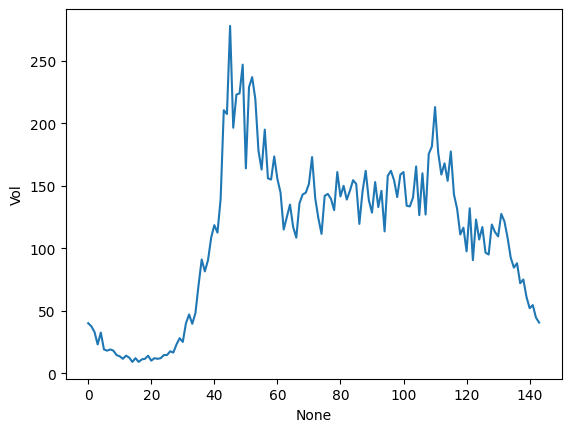

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.lineplot(x=df.index, y=df["Vol"])
#df["Vol"].plot()


<Axes: xlabel='Label', ylabel='count'>

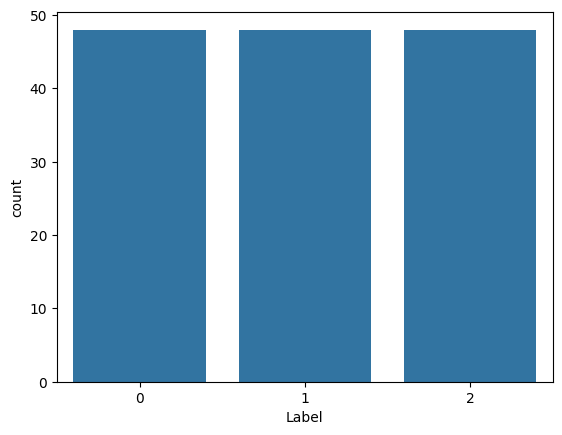

In [3]:
sns.countplot(x="Label", data=df)

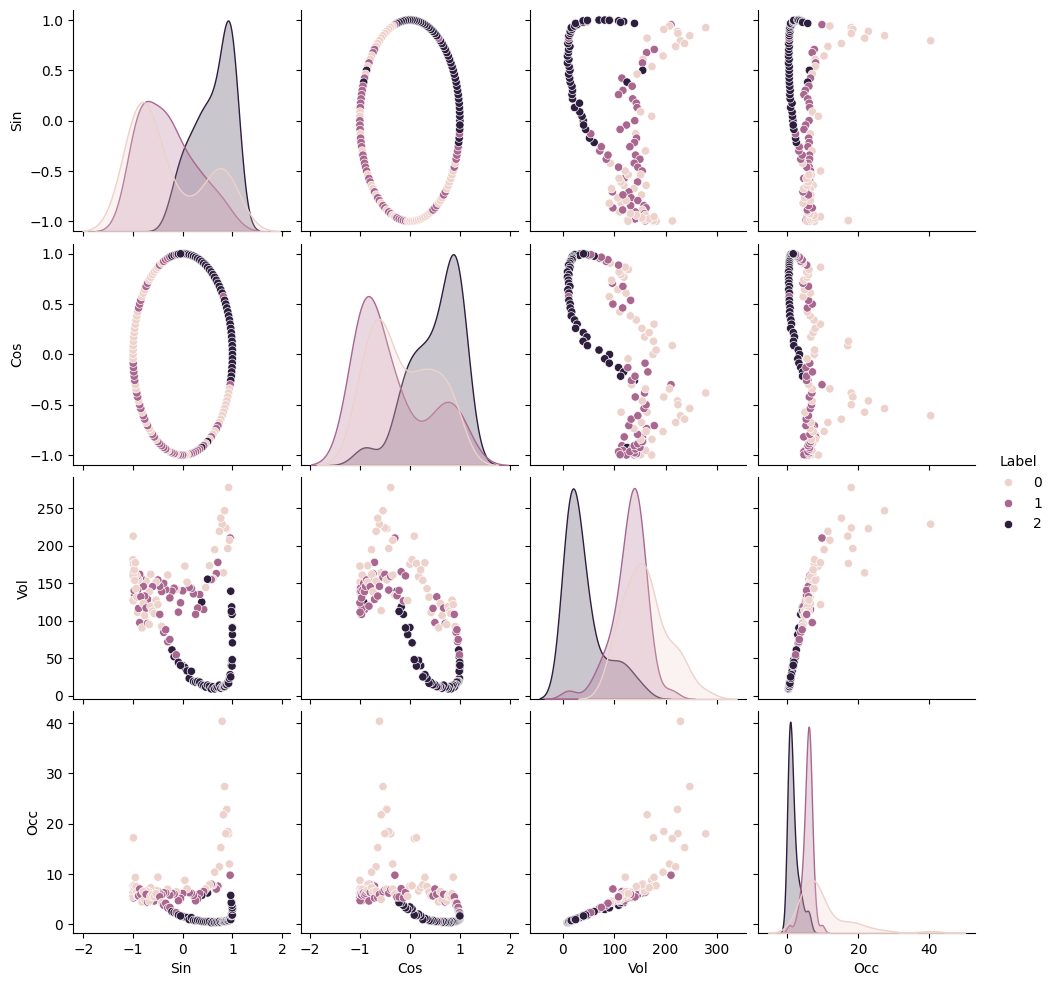

In [4]:

sns.pairplot(df, hue="Label", diag_kind="kde")